In [16]:
# Import necessary modules from Qiskit and mthree
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import mthree

In [17]:
# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)        # Hadamard on qubit 0
qc.cx(0, 1)    # CNOT from qubit 0 to 1
qc.cx(0, 2)    # CNOT from qubit 0 to 2
qc.measure([0, 1, 2], [0, 1, 2])  # Measure all qubits


In [18]:
# Transpile the circuit for the backend
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

In [19]:
# Simulate the circuit directly using BackendV2 (no need for assemble)
job = backend.run(transpiled_qc, shots=1000)
result = job.result()
counts = result.get_counts()

In [20]:
# Print original (noisy) measurement results
print(f"Original Counts: {counts}")

Original Counts: {'111': 509, '000': 491}


In [21]:
# Initialize mthree mitigator and calibrate for qubits [0, 1, 2]
mitigator = mthree.M3Mitigation(backend)
mitigator.cals_from_system([0, 1, 2])

In [30]:
# Apply measurement error mitigation
mitigated_counts = mitigator.apply_correction(counts, qubits=[0, 1, 2]).nearest_probability_distribution()


In [28]:
# Print mitigated counts
print(f"Mitigated Counts: {mitigated_counts}")

Mitigated Counts: {'000': np.float32(0.491), '111': np.float32(0.509)}


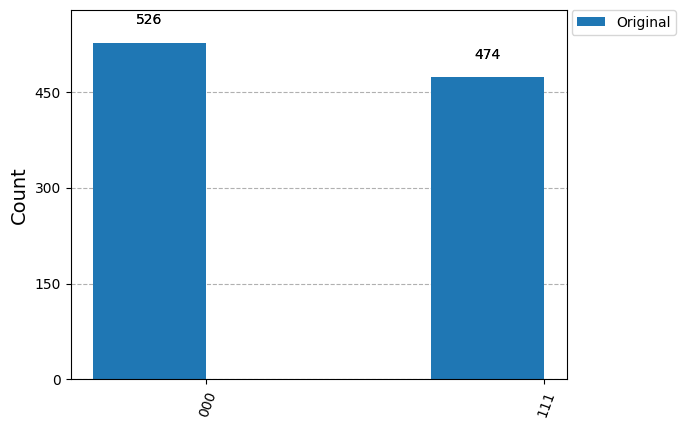

In [15]:
# Plot histograms for original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])